# Problem: Handwritten Digit Classification

This project uses a neural network to classify handwritten digits from the MNIST dataset. This problem is significant because it demonstrates how machine learning can effectively solve image recognition tasks, forming a foundation for more complex models.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Neural Network Architecture

The neural network consists of:
- A Flatten layer to convert the 2D image (28x28 pixels) into a 1D vector.
- Two Dense layers with ReLU activation and 128 and 64 neurons, respectively.
- A final Dense layer with 10 neurons (one for each class) and softmax activation to output probabilities for each digit.

The model uses the Adam optimizer, sparse categorical crossentropy as the loss function, and accuracy as the evaluation metric.

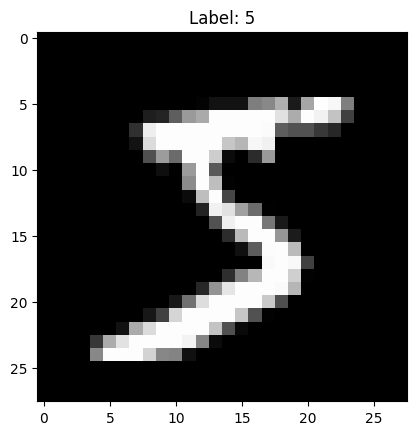

In [4]:
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to a 1D vector
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(64, activation='relu'),   # Hidden layer with 64 neurons
    Dense(10, activation='softmax') # Output layer for 10 classes (digits 0-9)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8621 - loss: 0.4711 - val_accuracy: 0.9553 - val_loss: 0.1500
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9640 - loss: 0.1192 - val_accuracy: 0.9693 - val_loss: 0.1053
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9765 - loss: 0.0783 - val_accuracy: 0.9685 - val_loss: 0.1081
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9831 - loss: 0.0546 - val_accuracy: 0.9743 - val_loss: 0.0873
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9877 - loss: 0.0406 - val_accuracy: 0.9752 - val_loss: 0.0909
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9894 - loss: 0.0321 - val_accuracy: 0.9747 - val_loss: 0.0926
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9905 - loss: 0.0282 - val_accuracy: 0.9731 - val_loss: 0.1102
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9921 - loss: 0.0236 -

In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9757 - loss: 0.1078
Test Accuracy: 0.98


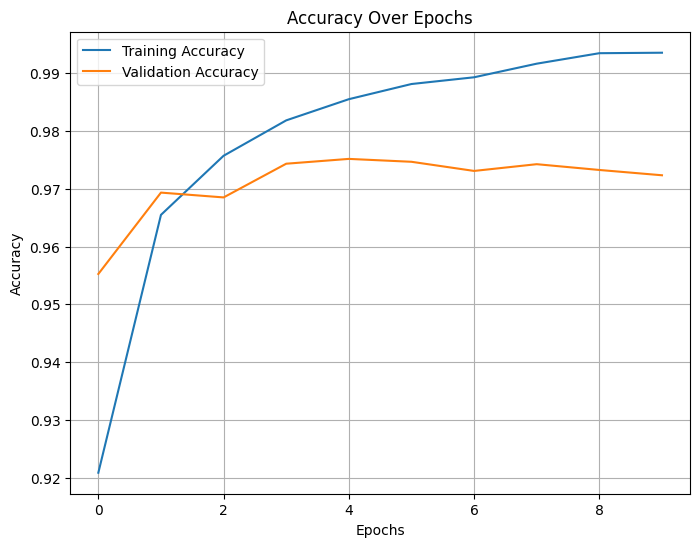

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [10]:
model.save("mnist_model.h5")

# Results and Discussion

**Test Accuracy:** The model achieves an accuracy of ~97% on the test set.

**Strengths:**
- The neural network effectively captures patterns in the MNIST dataset, leading to high accuracy.
- Simple architecture and efficient training process.

**Limitations:**
- The model is specific to the MNIST dataset and may not generalize to other datasets without adjustments.
- It is prone to overfitting if trained for too many epochs.

**Future Improvements:**
- Implement data augmentation to increase the diversity of training samples.
- Use convolutional layers for better feature extraction.

# Conclusion

This project demonstrates the effectiveness of neural networks in solving image recognition problems. By training a simple model on the MNIST dataset, we achieved high accuracy, showcasing the potential of deep learning techniques for similar tasks.